In [1]:
# all import statements
import numpy as np
import pandas as pd
import pydicom as pyd
import os
import matplotlib.pyplot as plt
import mudicom

from os.path import dirname, join
from pydicom.data import get_testdata_files
from pydicom.filereader import read_dicomdir
from PIL import Image

from scipy.misc import imresize
from scipy.signal import convolve2d
import scipy
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

In [2]:
PATH = 'data/stage_2_train_images/'

In [5]:
def extract_img_array(path, getID = False):
    lst_files = []
    for dir_name, sub_dir_list, file_list in os.walk(path):
        for file_name in file_list:
            if ".dcm" in file_name.lower():
                lst_files.append(os.path.join(dir_name, file_name))
    dcm_np = []
    _ids = []
    for dcm in lst_files:
        img = pyd.dcmread(dcm)
        img = pyd.pixel_array 
        dcm_np.append(img)
        if getID == True:
            _ids.append(dcm.split('/')[1].split('.')[0])

    return dcm_np, _ids



 

In [6]:
x, u = extract_img_array(PATH)

AttributeError: module 'pydicom' has no attribute 'pixel_array'

In [4]:
lstFilesDCM = []  
for dirName, subdirList, fileList in os.walk(PATH):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

In [5]:
len(lstFilesDCM)

26684

In [6]:
dcm_40 = []
for img in range(40):
    dcm_40.append(lstFilesDCM[img])

In [7]:
dcm_np = []
pat_ids = []
for dcm in dcm_40:
    pat_ids.append(dcm.split('/')[2].split('.')[0])
    img = mudicom.load(dcm)
    img = img.image
    img = img.numpy
    dcm_np.append(img)


In [8]:
def show(img, title=None):
    plt.imshow(img, cmap=plt.cm.bone)
    if title is not None: plt.title = title

def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap=plt.cm.bone)

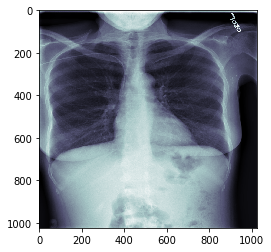

In [30]:
show(dcm_np[1])

In [31]:
img = dcm_np[1]

In [32]:
type(img)

numpy.ndarray

In [33]:
img.shape

(1024, 1024)

In [34]:
img[1,:]

array([255., 254., 253., ..., 255., 255., 139.])

In [35]:
img[2,1]

255.0

In [47]:
b = np.zeros((1024, 1025))

In [48]:
b.shape

(1024, 1025)

In [49]:
# b[:,:-1] = a
b[:,:-1] = img

In [50]:
b

array([[255., 255., 255., ..., 254., 138.,   0.],
       [255., 254., 253., ..., 255., 139.,   0.],
       [255., 255., 254., ..., 255., 139.,   0.],
       ...,
       [ 16.,  15.,  15., ...,  10.,   0.,   0.],
       [ 16.,  16.,  15., ...,  10.,   0.,   0.],
       [ 16.,  16.,  15., ...,  10.,   0.,   0.]])

In [73]:
k1 = np.array([[ -2-3j, 1-10j,  +1 -3j],
                   [-1+4j, 1+ 1j, +8 +0j],
                   [ -3+3j, 1+10j,  +1 +3j]]) # Gx + j*Gy

IndexError: too many indices for array

In [74]:
grad = convolve2d(one, k1, boundary='symm', mode='same')

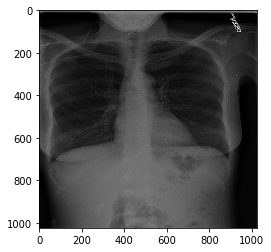

In [75]:
plt.imshow(np.absolute(grad), cmap='gray')

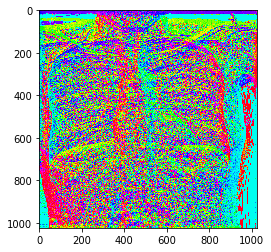

In [63]:
plt.imshow(np.angle(grad), cmap='hsv')

In [69]:
k2 = np.array([
    [1e-2,1e-2,1e-2],
    [2e-3,3e-3,3e-3],
    [0,0,0]
])

In [70]:
grad = convolve2d(one, k2, boundary='symm', mode='same')

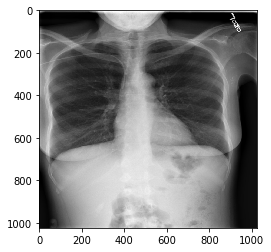

In [71]:
plt.imshow(np.absolute(grad), cmap='gray')

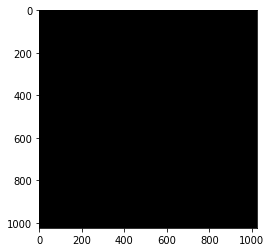

In [72]:
plt.imshow(np.angle(grad), cmap='gray')

In [76]:
k2 = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

In [77]:
grad = convolve2d(one, k2, boundary='symm', mode='same')

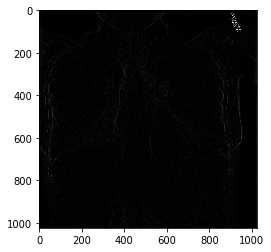

In [78]:
plt.imshow(np.absolute(grad), cmap='gray')

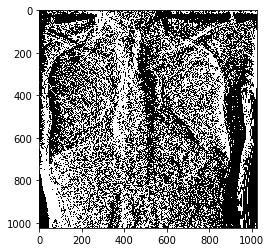

In [81]:
plt.imshow(np.angle(grad), cmap='gray')

In [118]:
k3 = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])


In [83]:
grad = convolve2d(one, k3, mode='same')

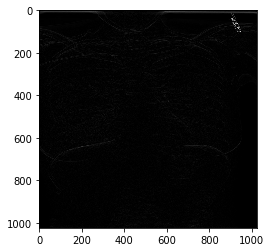

In [84]:
plt.imshow(np.absolute(grad), cmap='gray')

In [85]:
k4 = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

In [86]:
grad1 = convolve2d(one, k3, mode='same')
grad2 = convolve2d(one, k4, mode='same')

In [87]:
grad = np.sqrt(grad1**2 + grad2**2)

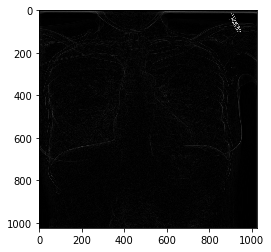

In [88]:
plt.imshow(np.absolute(grad), cmap='gray')

In [91]:
grad = np.arctan(grad2/grad1)

/Users/thevatsal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/thevatsal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


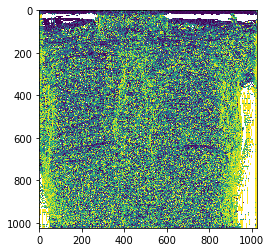

In [93]:
plt.imshow(np.absolute(grad))

In [94]:
#sobel

In [95]:
s1 = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
s2 = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

In [104]:
grad1 = convolve2d(one, s1, mode='same')
grad2 = convolve2d(one, s2, mode='same')

In [105]:
grad = np.sqrt(grad1**2, grad2**2)

In [102]:
one = dcm_np[2]

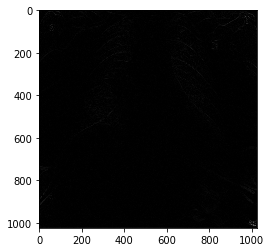

In [106]:
plt.imshow(np.absolute(grad), cmap='gray')

In [116]:
one = dcm_np[0]

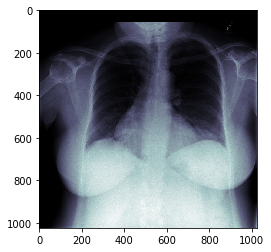

In [117]:
show(one)

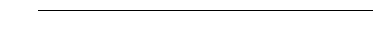

In [119]:
for x in range(len(one)):
    grad = convolve2d(one[x:,], k3, mode='same')
    plt.axis('off')
    plt.imshow(grad, cmap='gray')
    

In [120]:
grad

array([[0., 0., 0., ..., 0., 0., 0.]])

In [109]:
one[x].shape

(1024,)

In [127]:
# # one[x,:,:].shape
# >>> from numpy import zeros, newaxis
# >>> a = zeros((6, 8))
# >>> a.shape
# (6, 8)
# >>> b = a[:, :, newaxis]
# >>> b.shape
# (6, 8, 1)

In [132]:
b = np.zeros((1024, 1024))
b.shape

(1024, 1024)

In [133]:
from numpy import newaxis

In [134]:
one = one[newaxis, : , :]

In [136]:
one.shape

(1, 1024, 1024)

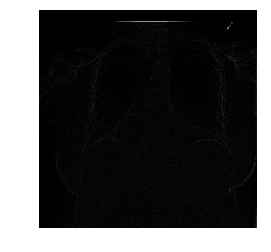

In [145]:
for x in range(len(one)):
    grad1 = convolve2d(one[x,:,:], s1, mode='same')
    grad2 = convolve2d(one[x,:,:], s2, mode='same')
    
    grad = np.sqrt(grad1**2 + grad2**2)
#     grad = np.arctan(grad2/grad1)
    plt.axis('off')
    plt.imshow(grad, cmap='gray')

In [151]:
for x in range(len(one)):
    segments = slic(one[x,:,:], n_segments=10, sigma=40, compactness=20)
    plt.axis('off')
    plt.imshow(mark_boundaries(one[x,:,:], segments))
    

TypeError: slic() got an unexpected keyword argument 'scale'

/usr/local/lib/python3.7/site-packages/skimage/segmentation/_felzenszwalb.py:60: RuntimeWarning: Got image with third dimension of 1024. This image will be interpreted as a multichannel 2d image, which may not be intended.
  min_size=min_size)


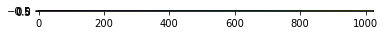

In [153]:
from skimage.segmentation import felzenszwalb
from skimage.data import coffee
img = one
segments = felzenszwalb(img, scale=3.0, sigma=0.95, min_size=5)
plt.imshow(segments)

In [154]:
from skimage.future import graph
from skimage import data, segmentation, color, filters, io


In [167]:
img = dcm_np[1]

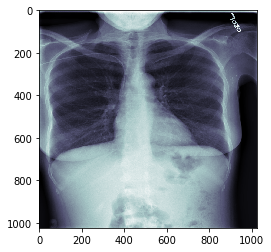

In [168]:
show(img)

In [169]:
# segments = felzenszwalb(img, scale=3.0, sigma=0.95, min_size=5)
# plt.imshow(segments)

In [170]:
gimg = color.rgb2gray(img)

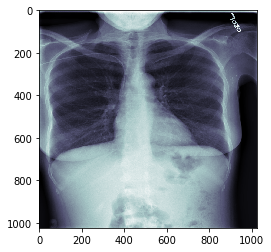

In [171]:
show(gimg)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


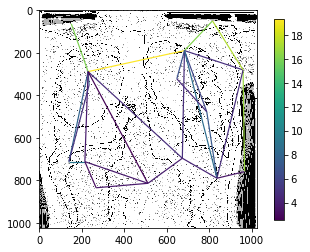

In [173]:
lables = segmentation.slic(img, compactness=30, n_segments=20)
edges = filters.sobel(img)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(lables, edges)
lc = graph.show_rag(lables, g, edges_rgb, img_cmap=None, edge_cmap='viridis', edge_width=1.2)
plt.colorbar(lc, fraction=0.03)
io.show()